In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -v -p numpy,matplotlib,scipy

Sebastian Raschka 

CPython 3.6.1
IPython 6.0.0

numpy 1.13.0
matplotlib 2.0.2
scipy 0.19.0


# Covariance and Correlation

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn.apionly as sns
%matplotlib inline

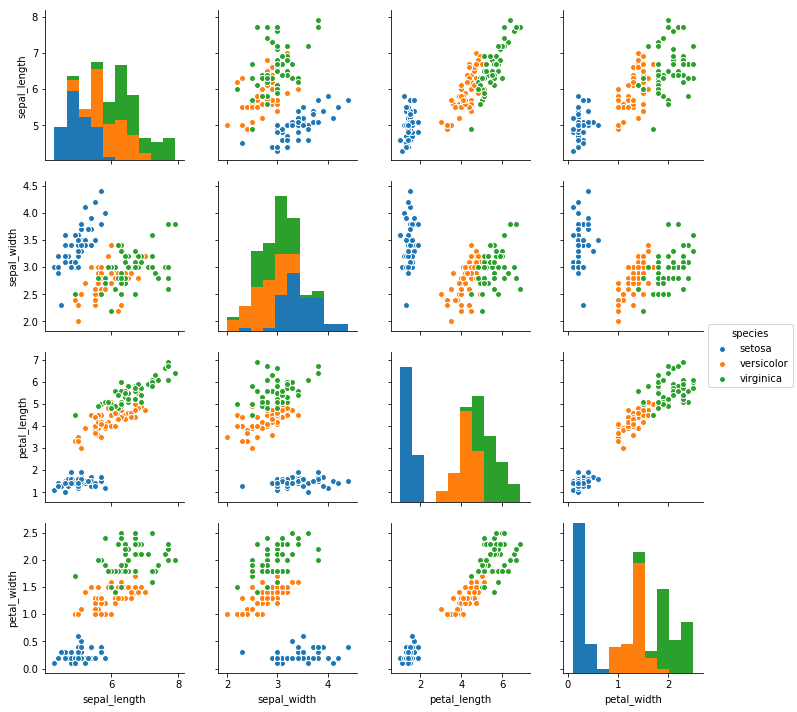

In [3]:
# read dataset
df = pd.read_csv('../datasets/iris/iris.csv')

# create scatterplot matrix
fig = sns.pairplot(data=df, 
                   hue='species')

plt.show()

In [4]:
X = df[df.columns[:-1]].values
X.shape

(150, 4)

## Sample Covariance

- measures how two variables differ from their mean
- positive covariance: that the two variables are both above or both below their respective means
- variables with a positive covariance are positively "correlated" -- they go up or done together
- negative covariance: valuables from one variable tends to be above the mean and the other below their mean
- in other words, negative covariance means that if one variable goes up, the other variable goes down

$$\sigma_{x,y} = \frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})$$

- note that similar to variance, the dimension of the covariance is $unit^2$
- covariance can be understood as the "variability due to codependence" whereas the variance is the "independent variability"

In [5]:
x_mean, y_mean = np.mean(X[:, 2:4], axis=0)

sum([(x - x_mean) * (y - y_mean) 
     for x, y in zip(X[:, 2], X[:, 3])]) / (X.shape[0] - 1)

1.2956093959731545

Covariance matrix for the 4-feature dataset:

$$
\Sigma = \begin{bmatrix}
    \sigma_{1}^2  & \sigma_{1,2} & \sigma_{1,3} & \sigma_{1,4} \\
    \sigma_{2,1}  & \sigma_{2}^2 & \sigma_{2,3} & \sigma_{2,4} \\
    \sigma_{3,1}  & \sigma_{3,2} & \sigma_{3}^2 & \sigma_{4,3} \\
    \sigma_{4,1}  & \sigma_{4,2} & \sigma_{4,3} & \sigma_{4}^2
\end{bmatrix}
$$

- Notice the variance along the diagonal
- Remember, the sample variance is computed as follows:

$$\sigma^2_x = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2$$

In [6]:
np.cov(X.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

## Pearson Correlation Coefficient

- The pearson correlation is "dimensionless" version of the covariance, achieved by dividing by the standard deviation

- Remember, the standard deviation is computed as follows:
        
$$\sigma_x = \sqrt{\frac{1}{n-1}{\sum_{i=1}^n (x_i - \bar{x})^2}}$$    

- Pearson correlation:

$$\rho_{x, y} = \frac{\frac{1}{n-1} \sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\frac{1}{n-1}{\sum_{i=1}^n (x_i - \bar{x})^2}} \sqrt{\frac{1}{n-1}{\sum_{i=1}^n (y_i - \bar{y})^2}}}
$$

$$
= \frac{\sigma_{x,y}}{\sigma_x \sigma_y}
$$

- Measures degree of a linear relationship between variables, assuming the variables follow a normal distribution
- $\rho=1$: perfect positive correlation
- $\rho=-1$: perfect negative correlation
- $\rho=0$: no correlation

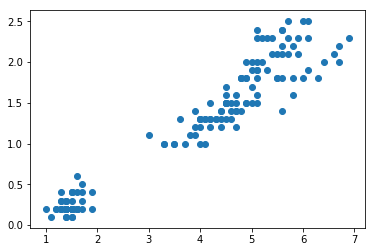

In [7]:
plt.scatter(X[:, 2], X[:, 3])

In [8]:
(np.cov(X[:, 2:4].T)[0, 1] / 
 (np.std(X[:, 2], ddof=1) * np.std(X[:, 3], ddof=1)))

0.96286543140279635

In [9]:
(np.cov(X[:, 2:4].T, ddof=0)[0, 1] / 
 (np.std(X[:, 2], ddof=0) * np.std(X[:, 3], ddof=0)))

0.96286543140279646

In [10]:
np.corrcoef(X[:, 2:4].T)

array([[ 1.        ,  0.96286543],
       [ 0.96286543,  1.        ]])

In [11]:
stats.pearsonr(X[:, 2], X[:, 3])

(0.96286543140279612, 4.6750039073275431e-86)

> The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets. The p-values are not entirely reliable but are probably reasonable for datasets larger than 500 or so.  
(https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.stats.pearsonr.html)

## About Scaled Variables

In [12]:
standardized = (X - X.mean()) / X.std()

#### Pearson unaffected

In [13]:
np.corrcoef(X.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [14]:
np.corrcoef(standardized.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

#### Covariance affected

In [15]:
np.cov(X.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [16]:
np.cov(standardized.T)

array([[ 0.17599681, -0.01089153,  0.32707828,  0.13251109],
       [-0.01089153,  0.04876198, -0.08461283, -0.03122115],
       [ 0.32707828, -0.08461283,  0.7998544 ,  0.3325438 ],
       [ 0.13251109, -0.03122115,  0.3325438 ,  0.14912676]])

## Spearman and Kendall-Tau Correlation Coefficients

- to be continued